In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np

from scipy.stats import ttest_ind
from scipy.stats import t

In [2]:
cd O:\TUD\__Arp-cortex\_____final-for-thesis\code\data

O:\TUD\__Arp-cortex\_____final-for-thesis\code\data


# start from the data that was extracted for each vesicle

In [3]:
df_empty = pd.read_csv('contours_empty-vesicle.csv', index_col=0)
df_empty['GUV type']=['bare']*len(df_empty)

In [4]:
df_cortex = pd.read_csv('contours_with_actin.csv', index_col=0)
df_cortex['GUV type']=['cortex']*len(df_empty)

In [5]:
df = pd.concat([df_empty, df_cortex])
df

,x,y,frame,angle,xdiff,ydiff,rms displacement,GUV type
0,72.000000,72.000000,0.0,1.0,NaN,NaN,NaN,bare
1,71.995735,71.995735,0.0,2.0,NaN,NaN,NaN,bare
2,71.982943,71.982943,0.0,3.0,NaN,NaN,NaN,bare
3,71.961627,71.961627,0.0,4.0,NaN,NaN,NaN,bare
4,72.929357,72.929357,0.0,5.0,NaN,NaN,NaN,bare
...,...,...,...,...,...,...,...,...
17995,124.027844,124.027844,49.0,356.0,0.348669,0.348669,0.493092,cortex
17996,124.099050,124.099050,49.0,357.0,0.348669,0.348669,0.493092,cortex
17997,123.155826,123.155826,49.0,358.0,-0.649961,-0.649961,0.919183,cortex
17998,123.194652,123.194652,49.0,359.0,-0.650722,-0.650722,0.920260,cortex


# Corrected RMS calculation

In [6]:
df['X^2 (one section, one frame)'] =  df['xdiff']**2 + df['ydiff']**2

In [7]:
df_framewise = df.groupby(['GUV type','frame']).sum()

In [8]:
Nsegments = 360

df_framewise.reset_index(inplace=True)
df_framewise.rename(columns={'X^2 (one section, one frame)': 'X2 (sum over membrane, one frame)'}, inplace=True)
df_framewise['X2 (mean membrane, one frame)'] = df_framewise['X2 (sum over membrane, one frame)']/Nsegments
df_framewise['X_rms (mean membrane, one frame)']=np.sqrt(df_framewise['X2 (mean membrane, one frame)'])
df_framewise

,GUV type,frame,x,y,angle,xdiff,ydiff,rms displacement,"X2 (sum over membrane, one frame)","X2 (mean membrane, one frame)","X_rms (mean membrane, one frame)"
0,bare,0.0,15887.390533,15887.390533,64980.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,bare,1.0,16205.338437,16205.338437,64980.0,317.947903,317.947903,754.138261,4223.597963,11.732217,3.425232
2,bare,2.0,16148.996770,16148.996770,64980.0,-56.341667,-56.341667,709.791456,4058.089194,11.272470,3.357450
3,bare,3.0,15834.774670,15834.774670,64980.0,-314.222100,-314.222100,735.150556,3565.955355,9.905432,3.147290
4,bare,4.0,15845.587686,15845.587686,64980.0,10.813016,10.813016,695.196968,3291.072156,9.141867,3.023552
...,...,...,...,...,...,...,...,...,...,...,...
95,cortex,45.0,26150.947987,26150.947987,64980.0,136.189219,136.189219,314.953847,466.999543,1.297221,1.138956
96,cortex,46.0,25680.912770,25680.912770,64980.0,-470.035217,-470.035217,690.883890,3967.031335,11.019531,3.319568
97,cortex,47.0,25949.909149,25949.909149,64980.0,268.996379,268.996379,472.421034,1285.898505,3.571940,1.889958
98,cortex,48.0,25779.128028,25779.128028,64980.0,-170.781121,-170.781121,484.627336,2482.792029,6.896645,2.626146


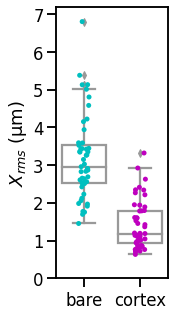

In [9]:
sns.set_context('talk')

f = plt.figure(figsize=[2, 5])

ax = sns.stripplot(data=df_framewise.loc[df_framewise['X2 (mean membrane, one frame)']>0], 
                     x='GUV type', y='X_rms (mean membrane, one frame)', 
                     #hue='type', 
                   palette=['c', 'm'])

sns.boxplot(data=df_framewise.loc[df_framewise['X2 (mean membrane, one frame)']>0], 
                     x='GUV type', y='X_rms (mean membrane, one frame)', 
                     #hue='type', 
                   color='w')

ax.set_xlabel('')
ax.set_ylabel('$X_{rms}$ (\u03bcm)')
ax.set_ylim(-0,7.2)
#ax.legend(bbox_to_anchor=(1.05, 1), loc=2 )

fig = ax.get_figure()
fig.savefig('CORRECTED_strip_rms-membrane-displacement_comparison.png', dpi=300, bbox_inches='tight')

In [10]:
df_framewise.loc[df_framewise['X2 (mean membrane, one frame)']>0].groupby('GUV type').median()['X_rms (mean membrane, one frame)']

GUV type
bare      2.956826
cortex    1.170957
Name: X_rms (mean membrane, one frame), dtype: float64

In [11]:
# filter outliers 
# note that these were tracking artefacts (bright stuff floating through the image) so need to be discarded
outliers_limit_withactin = 8 
outliers_limit_empty = 15

In [12]:
x1 = df_empty.loc[df_empty['rms displacement']<outliers_limit_empty]['frame'].unique()
y1 = df_empty.loc[df_empty['rms displacement']<outliers_limit_empty].groupby('frame').mean()['rms displacement']**2
#plt.scatter(x1,y1, c='c')

x2 = df_cortex.loc[df_cortex['rms displacement']<outliers_limit_withactin]['frame'].unique()
y2 = df_cortex.loc[df_cortex['rms displacement']<outliers_limit_withactin].groupby('frame').mean()['rms displacement']**2

#plt.scatter(x2,y2, c='m')

df1 = pd.DataFrame(columns=['frame', 'mean rms displacement'])
df1['frame']=x1
df1['mean rms displacement'] = y1
df1['type']=['bare']*len(df1)

df2 = pd.DataFrame(columns=['frame', 'mean rms displacement'])
df2['frame']=x2
df2['mean rms displacement'] = y2
df2['type']=['cortex']*len(df2)

df_plot = pd.concat([df1, df2])

df_plot['rms disp (um)'] = df_plot['mean rms displacement']*0.119

In [13]:
df_plot.groupby('type').sum()

,frame,mean rms displacement,rms disp (um)
type,,,
bare,1225.0,302.025241,35.941004
cortex,1225.0,47.777820,5.685561


In [14]:
df_plot.groupby('type').mean()

,frame,mean rms displacement,rms disp (um)
type,,,
bare,25.0,6.292193,0.748771
cortex,25.0,0.995371,0.118449


In [15]:
df_plot.groupby('type').median()

,frame,mean rms displacement,rms disp (um)
type,,,
bare,25.0,3.891616,0.463102
cortex,25.0,0.712548,0.084793


In [16]:
0.463102/0.084793

5.461559326831225

In [17]:
0.748771/0.118449

6.321463245785106

In [18]:
df_plot

,frame,mean rms displacement,type,rms disp (um)
0,1.0,NaN,bare,NaN
1,2.0,3.357295,bare,0.399518
2,3.0,3.224732,bare,0.383743
3,4.0,3.663758,bare,0.435987
4,5.0,3.546482,bare,0.422031
...,...,...,...,...
44,45.0,0.789691,cortex,0.093973
45,46.0,0.765401,cortex,0.091083
46,47.0,2.418215,cortex,0.287768
47,48.0,1.492198,cortex,0.177572


### student's t test to check that both distributions are indeed different

In [19]:
t_stat, p = ttest_ind(df_plot.loc[df_plot['type']=='bare']['rms disp (um)'].dropna().values, 
                      df_plot.loc[df_plot['type']=='cortex']['rms disp (um)'].dropna().values)
print(f't={t_stat}, p={p}')

t=6.095422401332413, p=2.390947260988814e-08
